In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r'dataset.xlsx')
df.head()

,Customer ID,Gender,Age,Total Earning,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


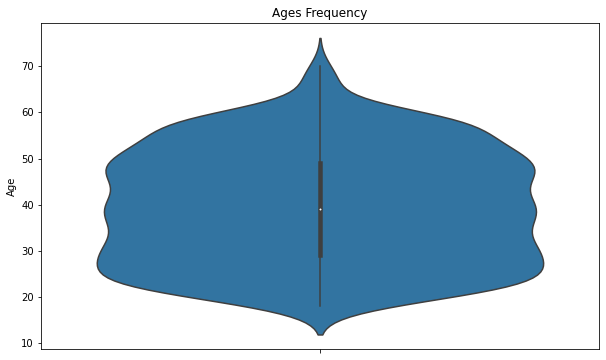

In [2]:
df.drop(["Customer ID"], axis = 1, inplace=True)

plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

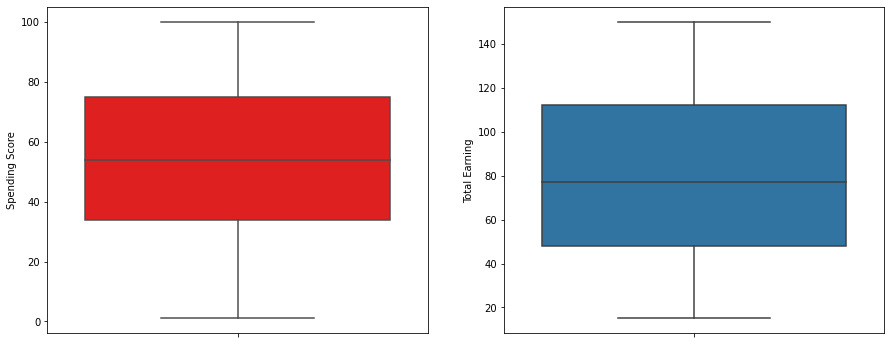

In [3]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Total Earning"])
plt.show()

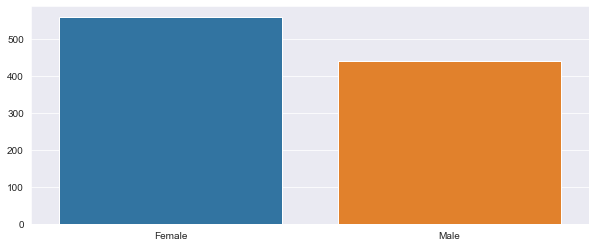

In [4]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

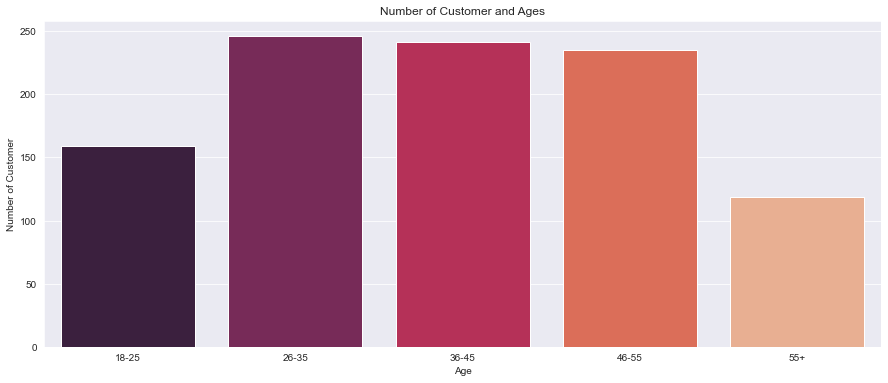

In [5]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

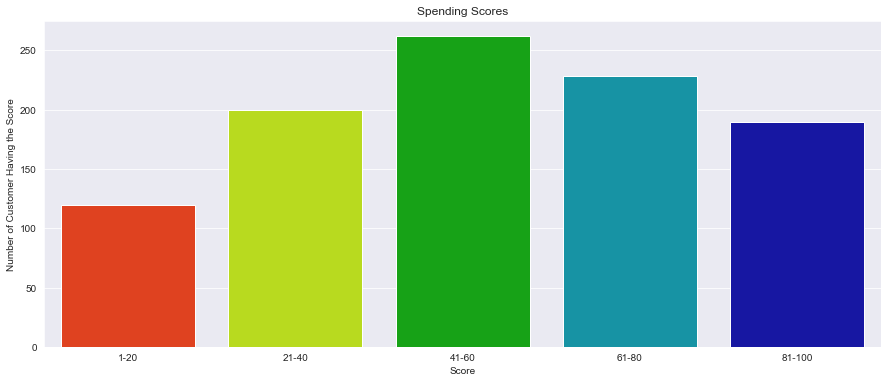

In [6]:
ss1_20 = df["Spending Score"][(df["Spending Score"] >= 1) & (df["Spending Score"] <= 20)]
ss21_40 = df["Spending Score"][(df["Spending Score"] >= 21) & (df["Spending Score"] <= 40)]
ss41_60 = df["Spending Score"][(df["Spending Score"] >= 41) & (df["Spending Score"] <= 60)]
ss61_80 = df["Spending Score"][(df["Spending Score"] >= 61) & (df["Spending Score"] <= 80)]
ss81_100 = df["Spending Score"][(df["Spending Score"] >= 81) & (df["Spending Score"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

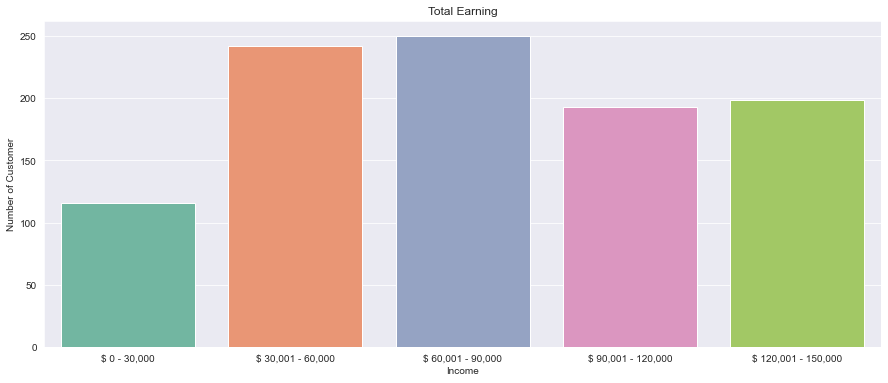

In [7]:
ai0_30 = df["Total Earning"][(df["Total Earning"] >= 0) & (df["Total Earning"] <= 30)]
ai31_60 = df["Total Earning"][(df["Total Earning"] >= 31) & (df["Total Earning"] <= 60)]
ai61_90 = df["Total Earning"][(df["Total Earning"] >= 61) & (df["Total Earning"] <= 90)]
ai91_120 = df["Total Earning"][(df["Total Earning"] >= 91) & (df["Total Earning"] <= 120)]
ai121_150 = df["Total Earning"][(df["Total Earning"] >= 121) & (df["Total Earning"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Total Earning")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

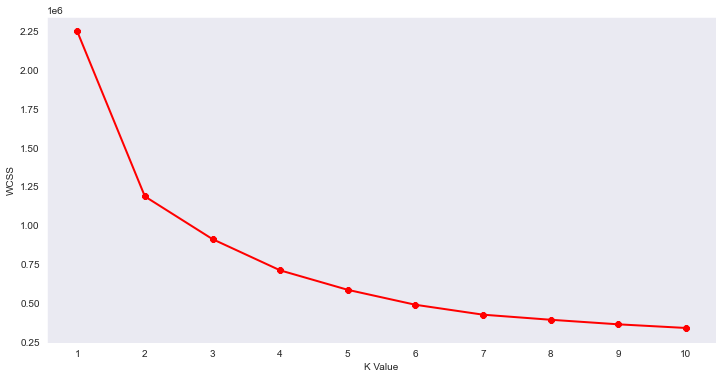

In [8]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

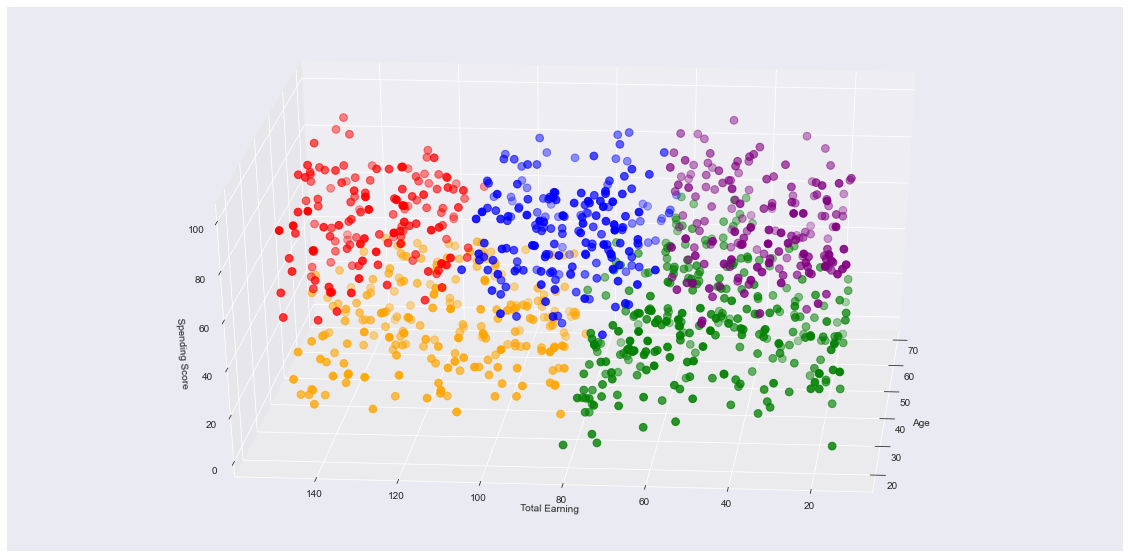

In [9]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Total Earning"][df.label == 0], df["Spending Score"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Total Earning"][df.label == 1], df["Spending Score"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Total Earning"][df.label == 2], df["Spending Score"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Total Earning"][df.label == 3], df["Spending Score"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Total Earning"][df.label == 4], df["Spending Score"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Total Earning")
ax.set_zlabel('Spending Score')
plt.show()

In [13]:
clusters

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 1,
       3, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 0, 4, 3, 1, 1, 4, 2, 3, 3, 1, 0,
       1, 2, 3, 2, 4, 3, 2, 0, 3, 4, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 0, 0, 2, 0, 3, 4, 3, 3, 1, 0, 4, 3, 2, 3, 0, 3, 2, 4,
       2, 3, 1, 1, 3, 2, 3, 3, 2, 1, 4, 2, 3, 4, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 2, 4, 4, 0, 3, 3, 2, 4, 1, 1, 3, 2, 4, 1,

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix",confusion_matrix(df['label'],kmeans.labels_))
print(classification_report(df['label'],kmeans.labels_))

ConfusionMatrix [[ 51   0   0  22   0   0 103   0  13   0]
 [ 18   0 112   0  14   0   0   0   0   0]
 [  0   0   0  57   0  55   0 101  69   2]
 [ 18   0   0   2  93   8   0   0   0  95]
 [  0 126   0   7   0   0   7   3  24   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.59      0.27      0.37       189
           1       0.00      0.00      0.00       144
           2       0.00      0.00      0.00       284
           3       0.02      0.01      0.01       216
           4       0.00      0.00      0.00       167
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
